In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
file_path = '/content/drive/MyDrive/updated_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(), data.info(), data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           65280 non-null  int64  
 1   DateKey                           65280 non-null  object 
 2   Discount Amount                   65278 non-null  float64
 3   Invoice Date                      65280 non-null  object 
 4   Invoice Number                    65280 non-null  int64  
 5   Item Class                        56995 non-null  object 
 6   Item Number                       65240 non-null  object 
 7   Item                              65280 non-null  object 
 8   Line Number                       65280 non-null  int64  
 9   List Price                        65280 non-null  float64
 10  Order Number                      65280 non-null  int64  
 11  Promised Delivery Date            65280 non-null  object 
 12  Sale

(    Custkey     DateKey  Discount Amount Invoice Date  Invoice Number  \
 0  10016609  12/31/2019           398.73   2019/12/31          329568   
 1  10016609  12/31/2019           268.67   2019/12/31          329569   
 2  10016609  12/31/2019           398.73   2019/12/31          329569   
 3  10016609  12/31/2019           466.45   2019/12/31          329569   
 4  10016609  12/31/2019           515.51   2019/12/31          329569   
 
   Item Class Item Number                        Item  Line Number  List Price  \
 0        P01       15640         Super Vegetable Oil         1000      163.47   
 1        P01       31681  Golden Fajita French Fries         7000      275.37   
 2        P01       15640         Super Vegetable Oil         4000      163.47   
 3        P01       13447            High Top Oranges         3000      119.52   
 4        P01       36942       Tell Tale New Potatos         9000      264.18   
 
    ...  Sales Amount Sales Amount Based on List Price  Sale

In [ ]:
data['DateKey'] = pd.to_datetime(data['DateKey'])

In [ ]:
data['Month'] = data['DateKey'].dt.month
data['DayOfWeek'] = data['DateKey'].dt.dayofweek
data['YearMonth'] = data['DateKey'].dt.to_period('M')

In [ ]:
data.set_index('DateKey', inplace=True)

In [ ]:
weekly_sales = data.groupby('Item').resample('W').agg({'Sales Quantity': 'sum', 'Sales Amount': 'sum'}).reset_index()

In [ ]:
weekly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89545 entries, 0 to 89544
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Item            89545 non-null  object        
 1   DateKey         89545 non-null  datetime64[ns]
 2   Sales Quantity  89545 non-null  int64         
 3   Sales Amount    89545 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
print("Weekly Sales")
print(weekly_sales.head(10))

Weekly Sales
                    Item    DateKey  Sales Quantity  Sales Amount
0  American Beef Bologna 2017-01-08              20        229.76
1  American Beef Bologna 2017-01-15               0          0.00
2  American Beef Bologna 2017-01-22               0          0.00
3  American Beef Bologna 2017-01-29               0          0.00
4  American Beef Bologna 2017-02-05               0          0.00
5  American Beef Bologna 2017-02-12              30        362.02
6  American Beef Bologna 2017-02-19               0          0.00
7  American Beef Bologna 2017-02-26               0          0.00
8  American Beef Bologna 2017-03-05               0          0.00
9  American Beef Bologna 2017-03-12               0          0.00


In [ ]:
valid_items = ['Thresher Spicy Mints', 'Even Better Whole Milk', 'Best Choice Potato Chips', 'Fast Corn Chips']

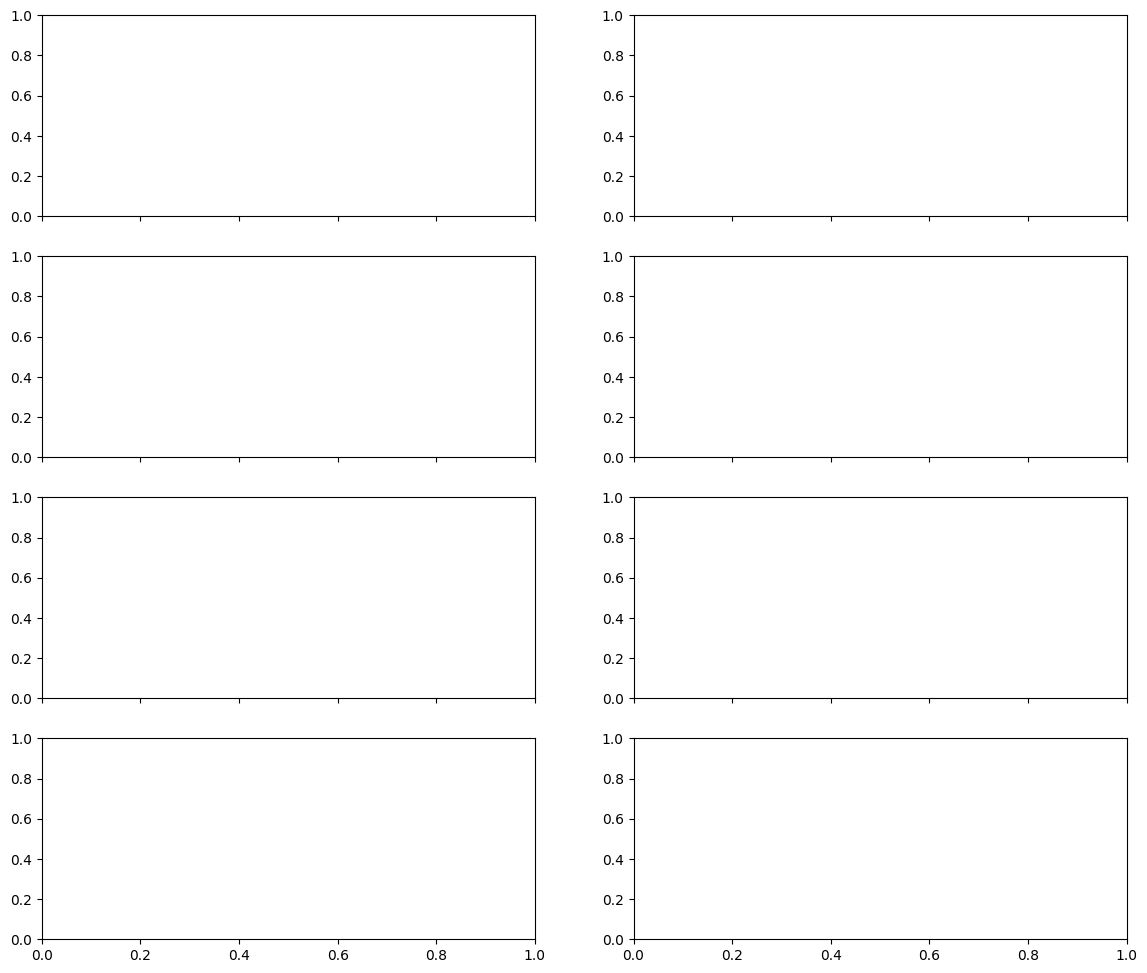

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12), sharex=True)

In [ ]:
for i, item in enumerate(valid_items):
    # Filter and prepare data
    item_data = weekly_sales[weekly_sales['Item'] == item].set_index('DateKey')
    item_data = item_data.asfreq('W', fill_value=0)


In [ ]:
decomposition = seasonal_decompose(item_data['Sales Quantity'], model='additive')

In [ ]:
for i, item in enumerate(valid_items):
    # Filter and prepare data
    item_data = weekly_sales[weekly_sales['Item'] == item].set_index('DateKey')
    item_data = item_data.asfreq('W', fill_value=0)

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(item_data['Sales Quantity'], model='additive')

    # Plot the results
    axes[i, 0].plot(decomposition.observed.index, decomposition.observed, label='Observed Sales')
    axes[i, 0].plot(decomposition.trend.index, decomposition.trend, label='Baseline (Trend)', linestyle='--')
    axes[i, 0].set_title(f'Observed vs. Baseline for {item}')
    axes[i, 0].legend()

    # Plot the components
    axes[i, 1].plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonality')
    axes[i, 1].plot(decomposition.resid.index, decomposition.resid, label='Residuals')
    axes[i, 1].set_title(f'Seasonal and Residual Components for {item}')
    axes[i, 1].legend()

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plot

<Figure size 640x480 with 0 Axes>

In [ ]:
for i, item in enumerate(valid_items):
    # Filter and prepare data
    item_data = weekly_sales[weekly_sales['Item'] == item].set_index('DateKey')
    item_data = item_data.asfreq('W', fill_value=0)

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(item_data['Sales Quantity'], model='additive')

    # Plot the results
    axes[i, 0].plot(decomposition.observed.index, decomposition.observed, label='Observed Sales')
    axes[i, 0].plot(decomposition.trend.index, decomposition.trend, label='Baseline (Trend)', linestyle='--')
    axes[i, 0].set_title(f'Observed vs. Baseline for {item}')
    axes[i, 0].legend()

    # Plot the components
    axes[i, 1].plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonality')
    axes[i, 1].plot(decomposition.resid.index, decomposition.resid, label='Residuals')
    axes[i, 1].set_title(f'Seasonal and Residual Components for {item}')
    axes[i, 1].legend()

# The lines that were in the last cell should be removed from there
# and are likely duplicates of the lines plotting seasonality in the loop above.
# If you intended to plot seasonality only, remove the lines plotting residuals
# in the loop above and uncomment and indent the lines below to replace them.
# However, based on the traceback, it seems the entire last cell was a mistake.
# axes[i, 1].plot(decomposition.seasonal.index, decomposition.seasonal)
# axes[i, 1].set_title(f'Seasonality for {item}')


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plot

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("ITEM DATA BASELINE SALES")
print(item_data)

ITEM DATA BASELINE SALES
                       Item  Sales Quantity  Sales Amount
DateKey                                                  
2017-01-08  Fast Corn Chips               4        389.47
2017-01-15  Fast Corn Chips               0          0.00
2017-01-22  Fast Corn Chips               5        450.91
2017-01-29  Fast Corn Chips               0          0.00
2017-02-05  Fast Corn Chips               0          0.00
...                     ...             ...           ...
2019-11-17  Fast Corn Chips               7        595.38
2019-11-24  Fast Corn Chips               0          0.00
2019-12-01  Fast Corn Chips               4        333.88
2019-12-08  Fast Corn Chips               1        360.00
2019-12-15  Fast Corn Chips               4        355.19

[154 rows x 3 columns]


In [ ]:
item_data_html_path = 'Weekly_Sales_Data.html'
item_data.to_html(item_data_html_path)

In [ ]:
random_item = np.random.choice(weekly_sales['Item'].unique())

In [ ]:
item_data = weekly_sales[weekly_sales['Item'] == random_item].set_index('DateKey')

In [ ]:
item_data = item_data.asfreq('W', fill_value=0)

# Decompose the time series of Sales Quantity
decomposition = seasonal_decompose(item_data['Sales Quantity'], model='additive')

<Axes: title={'center': 'Residuals'}, xlabel='DateKey'>

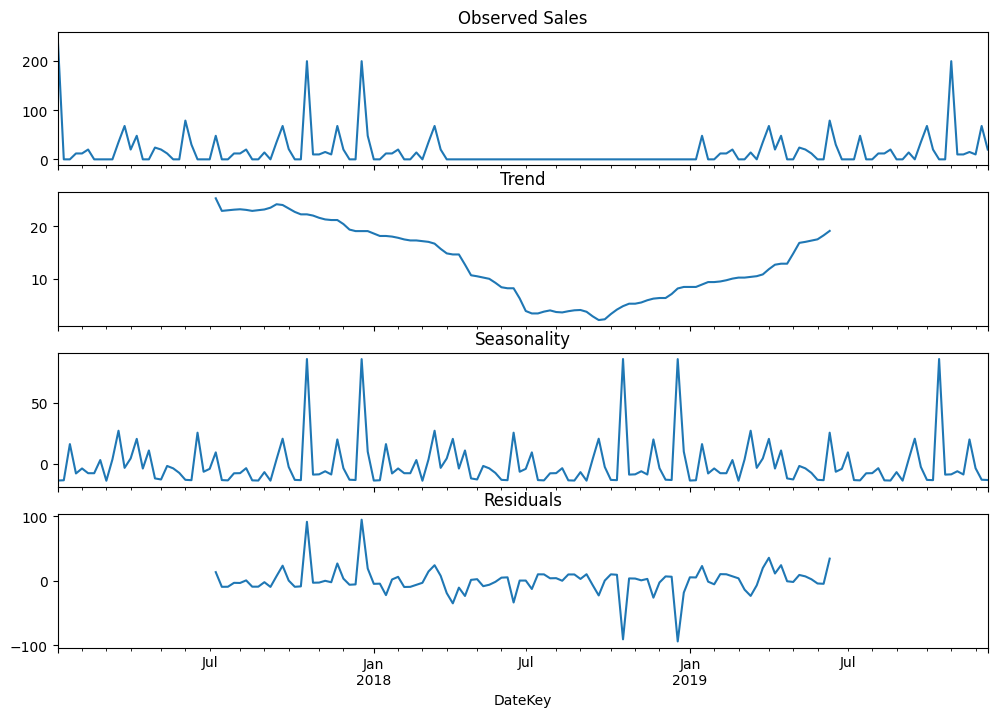

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposition.observed.plot(ax=ax[0], title='Observed Sales')
decomposition.trend.plot(ax=ax[1], title='Trend')
decomposition.seasonal.plot(ax=ax[2], title='Seasonality')
decomposition.resid.plot(ax=ax[3], title='Residuals')

In [ ]:
plt.tight_layout()
plt.show()

# Return the name of the randomly selected item
print("Select random item")
print(random_item)

<Figure size 640x480 with 0 Axes>

Select random item
Big Time Grape Popsicles


In [ ]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Extract year and month from 'Invoice Date' for grouping
data['YearMonth'] = data['Invoice Date'].dt.to_period('M')

# Group by 'YearMonth' and 'Item' to calculate monthly sales
monthly_sales_by_item = data.groupby(['YearMonth', 'Item'])['Sales Amount'].sum().unstack()

print("Monthly Sales by Item")
print(monthly_sales_by_item.head())


Monthly Sales by Item
Item       American Beef Bologna  American Chicken Hot Dogs  \
YearMonth                                                     
2017-01                   229.76                     813.42   
2017-02                   362.02                     993.79   
2017-03                      NaN                     204.72   
2017-04                      NaN                        NaN   
2017-05                      NaN                        NaN   

Item       American Cole Slaw  American Corned Beef  American Pimento Loaf  \
YearMonth                                                                    
2017-01                   NaN              21600.39                 215.95   
2017-02                   NaN                   NaN                1110.79   
2017-03                   NaN              38878.19                4917.36   
2017-04                   NaN              21600.39                 215.95   
2017-05                   NaN                   NaN                 

In [ ]:
# Find the first sales date for each item
first_sales_date = data.groupby('Item')['Invoice Date'].min().sort_values()

print("first sales date for each item")
print(first_sales_date.head())


# Convert first_sales_date to a DataFrame for merging
launch_dates = first_sales_date.reset_index()
launch_dates.columns = ['Item', 'Launch Date']

# Merge the launch dates with the main dataset
data_with_launch = pd.merge(data, launch_dates, on='Item', how='left')

# Filter records to keep only those from the launch date onwards
data_post_launch = data_with_launch[data_with_launch['Invoice Date'] >= data_with_launch['Launch Date']]

# Display the first few rows of the filtered dataset
print("Date post launch")
print(data_post_launch.head())
print(data_post_launch.shape)


first sales date for each item
Item
Landslide White Sugar        2017-01-01
Landslide Columbian Coffee   2017-01-01
Bravo Fancy Canned Oysters   2017-01-01
Moms Sliced Ham              2017-01-01
Moms Turkey Hot Dogs         2017-01-01
Name: Invoice Date, dtype: datetime64[ns]
Date post launch
    Custkey  Discount Amount Invoice Date  Invoice Number Item Class  \
0  10016609           398.73   2019-12-31          329568        P01   
1  10016609           268.67   2019-12-31          329569        P01   
2  10016609           398.73   2019-12-31          329569        P01   
3  10016609           466.45   2019-12-31          329569        P01   
4  10016609           515.51   2019-12-31          329569        P01   

  Item Number                        Item  Line Number  List Price  \
0       15640         Super Vegetable Oil         1000      163.47   
1       31681  Golden Fajita French Fries         7000      275.37   
2       15640         Super Vegetable Oil         4000      16

In [ ]:
grouped_data = data_post_launch.groupby(['Item', 'YearMonth'])['Sales Amount'].sum().unstack()

# Display the first few rows of the grouped data
print("Post Launch by Item and Month with Sales Amount ")
print(grouped_data.head())



# Aggregate sales data by item and month
monthly_sales_data = data.groupby(['Item', 'YearMonth'])['Sales Amount'].sum().reset_index()

# Pivot data for better visualization
monthly_pivot_data = monthly_sales_data.pivot(index='YearMonth', columns='Item', values='Sales Amount')

# Display the head of the pivoted data
print(monthly_pivot_data.head())


Post Launch by Item and Month with Sales Amount 
YearMonth                   2017-01  2017-02   2017-03   2017-04  2017-05  \
Item                                                                        
American Beef Bologna        229.76   362.02       NaN       NaN      NaN   
American Chicken Hot Dogs    813.42   993.79    204.72       NaN      NaN   
American Cole Slaw              NaN      NaN       NaN       NaN      NaN   
American Corned Beef       21600.39      NaN  38878.19  21600.39      NaN   
American Pimento Loaf        215.95  1110.79   4917.36    215.95      NaN   

YearMonth                  2017-06   2017-07  2017-08   2017-09  2017-10  ...  \
Item                                                                      ...   
American Beef Bologna          NaN       NaN   362.02       NaN   239.33  ...   
American Chicken Hot Dogs      NaN       NaN  1949.29    204.72  1256.75  ...   
American Cole Slaw          360.15       NaN  1224.54       NaN      NaN  ...   
Americ

In [ ]:
monthly_pivot_data_cleaned = monthly_pivot_data.dropna()

# Check the cleaned DataFrame
print(monthly_pivot_data_cleaned.info())
print(monthly_pivot_data_cleaned.head())

# Fill NaN values with zero
monthly_pivot_data_filled = monthly_pivot_data.fillna(0)

# Check the DataFrame after filling NaNs
print(monthly_pivot_data_filled.info())
print(monthly_pivot_data_filled.head())

# Filter data for 'American' and 'Atomic' prefixed products
american_products = monthly_pivot_data_filled.filter(regex='^American')
atomic_products = monthly_pivot_data_filled.filter(regex='^Atomic')

# Calculate the total sales for each group over time
american_total_sales = american_products.sum(axis=1)
atomic_total_sales = atomic_products.sum(axis=1)

# Convert PeriodIndex to DateTimeIndex for plotting
american_total_sales.index = pd.to_datetime(american_total_sales.index.to_timestamp())
atomic_total_sales.index = pd.to_datetime(atomic_total_sales.index.to_timestamp())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 0 entries
Freq: M
Columns: 657 entries, American Beef Bologna to Washington Strawberry Drink
dtypes: float64(657)
memory usage: 0.0 bytes
None
Empty DataFrame
Columns: [American Beef Bologna, American Chicken Hot Dogs, American Cole Slaw, American Corned Beef, American Pimento Loaf, American Potato Salad, American Roasted Chicken, American Sliced Ham, American Turkey Hot Dogs, Applause Canned Mixed Fruit, Applause Canned Peaches, Atomic Bubble Gum, Atomic Mint Chocolate Bar, Atomic Mints, Atomic Semi-Sweet Chocolate Bar, Atomic Spicy Mints, Atomic Tasty Candy Bar, Atomic White Chocolate Bar, BBB Best Apple Butter, BBB Best Apple Jam, BBB Best Apple Jelly, BBB Best Apple Preserves, BBB Best Brown Sugar, BBB Best Chunky Peanut Butter, BBB Best Columbian Coffee, BBB Best Corn Oil, BBB Best Creamy Peanut Butter, BBB Best Decaf Coffee, BBB Best Extra Chunky Peanut Butter, BBB Best Grape Jam, BBB Best Grape Jelly, BBB Best Grape Preserves, B

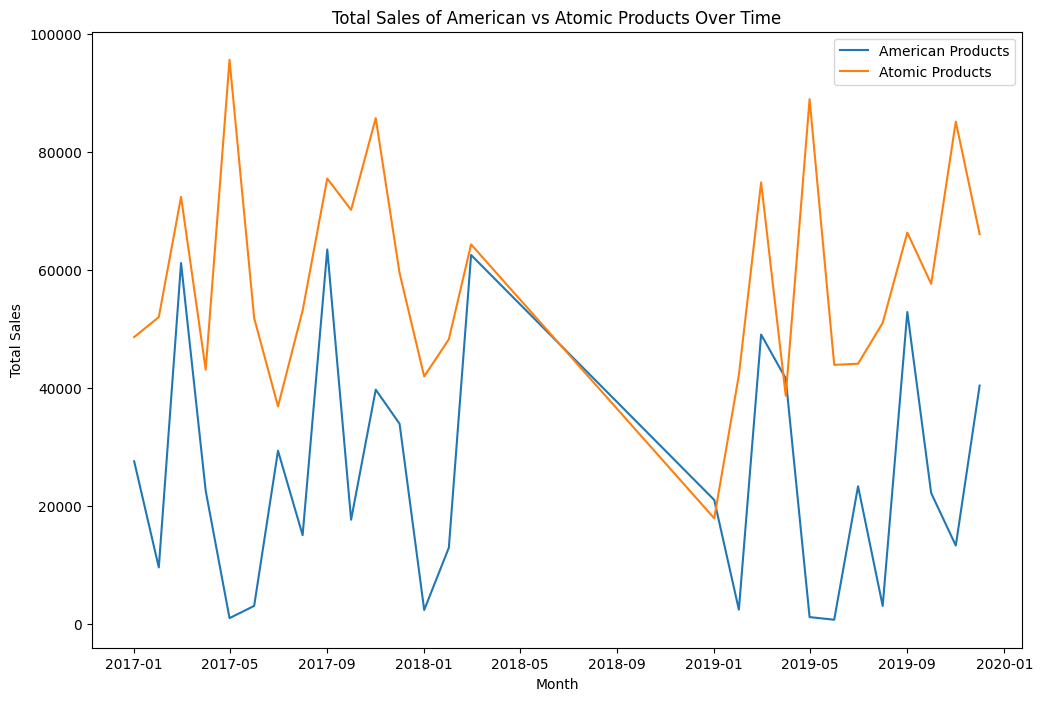

In [ ]:
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(american_total_sales, label='American Products')
plt.plot(atomic_total_sales, label='Atomic Products')
plt.title('Total Sales of American vs Atomic Products Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [ ]:
# Filter data for 'BBB Best' prefixed products
bbb_best_products = monthly_pivot_data_filled.filter(regex='^BBB Best')
# Calculate the total sales for the 'BBB Best' group over time
bbb_best_total_sales = bbb_best_products.sum(axis=1)
# Convert PeriodIndex to DateTimeIndex for plotting
bbb_best_total_sales.index = pd.to_datetime(bbb_best_total_sales.index.to_timestamp())

In [ ]:
# Filter data for 'Applause Canned' prefixed products
applause_canned_products = monthly_pivot_data_filled.filter(regex='^Applause Canned')
# Calculate the total sales for the 'Applause Canned' group over time
applause_canned_total_sales = applause_canned_products.sum(axis=1)
# Convert PeriodIndex to DateTimeIndex for plotting
applause_canned_total_sales.index = pd.to_datetime(applause_canned_total_sales.index.to_timestamp())

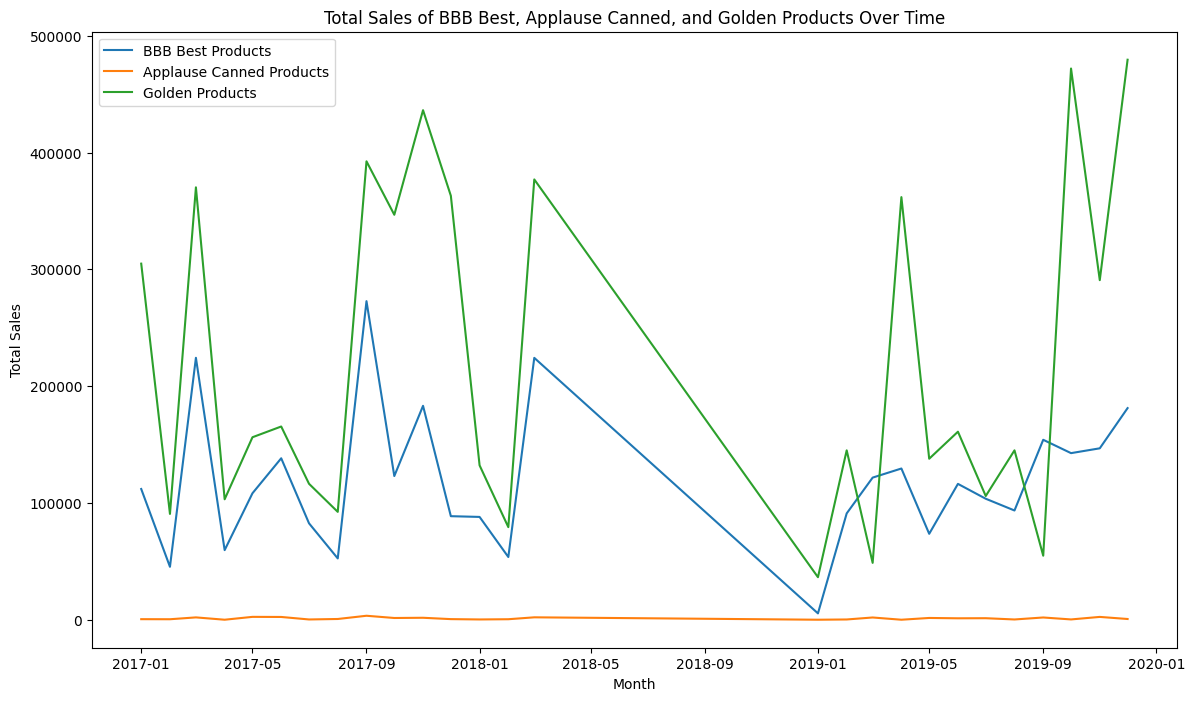

In [ ]:
golden_products = monthly_pivot_data_filled.filter(regex='^Golden')
# Calculate the total sales for the 'Golden' group over time
golden_total_sales = golden_products.sum(axis=1)
# Convert PeriodIndex to DateTimeIndex for plotting
golden_total_sales.index = pd.to_datetime(golden_total_sales.index.to_timestamp())


# Plot the total sales over time for each group to visualize potential cannibalization
plt.figure(figsize=(14, 8), facecolor='white')
plt.plot(bbb_best_total_sales, label='BBB Best Products')
plt.plot(applause_canned_total_sales, label='Applause Canned Products')
plt.plot(golden_total_sales, label='Golden Products')
plt.title('Total Sales of BBB Best, Applause Canned, and Golden Products Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

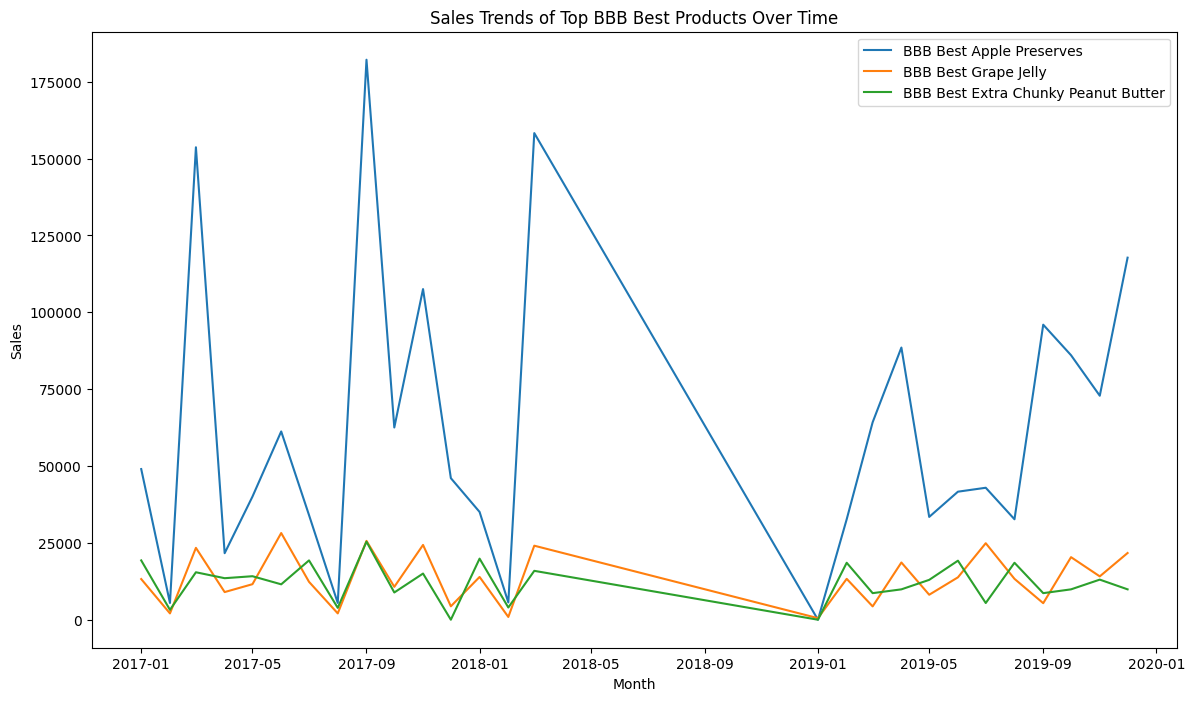

In [ ]:
# Aggregate sales data over time for the top 'BBB Best' products
bbb_best_apple_preserves_sales = monthly_pivot_data_filled['BBB Best Apple Preserves']
bbb_best_grape_jelly_sales = monthly_pivot_data_filled['BBB Best Grape Jelly']
bbb_best_extra_chunky_pb_sales = monthly_pivot_data_filled['BBB Best Extra Chunky Peanut Butter']

# Convert PeriodIndex to DateTimeIndex for plotting
bbb_best_apple_preserves_sales.index = pd.to_datetime(bbb_best_apple_preserves_sales.index.to_timestamp())
bbb_best_grape_jelly_sales.index = pd.to_datetime(bbb_best_grape_jelly_sales.index.to_timestamp())
bbb_best_extra_chunky_pb_sales.index = pd.to_datetime(bbb_best_extra_chunky_pb_sales.index.to_timestamp())

# Plot the sales trends
plt.figure(figsize=(14, 8), facecolor='white')
plt.plot(bbb_best_apple_preserves_sales, label='BBB Best Apple Preserves')
plt.plot(bbb_best_grape_jelly_sales, label='BBB Best Grape Jelly')
plt.plot(bbb_best_extra_chunky_pb_sales, label='BBB Best Extra Chunky Peanut Butter')
plt.title('Sales Trends of Top BBB Best Products Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()
